In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

import seaborn
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression

In [2]:
import duckdb, sqlalchemy
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

**Project Title:**

Did the Rise of Netflix Kill the Success of Movie Theaters?


**Research Questions:**

(1) What effect does the price of Netflix stocks have on worldwide box office revenue from 2002 to 2020?

(2) What effect does the price of Netflix stocks have on domestic box office revenue from 2002 to 2020?

(3) How has the price of the S&P 500 index affected domestic box office revenue from 2002 to 2020, diving into the potential effects of the overall economy on the trends of box office revenue?

**Data Collection and Cleaning:**

We found three datasets for our project, with each showing the following: Netflix stock prices from 2002-2021, box office revenue (worldwide, domestic, and international) from 1940-2020 of the Top 600 well-performing movies, and S&P 500 index prices from 1927-2020. These datasets were selected because they included data (collectively) from around the time range we were looking for (early 2000’s to around current day), and because they all had extensive data on the changing prices of the respective stocks/indexes and box office revenue, as needed to properly analyze our research questions. Regarding these three raw data files, below includes a documentation of all the steps we took to turn those files into the analysis-ready datasets needed for our final project.

Below is the raw data for netflix.csv, which shows Netflix stock prices from 2002 to 2021.

In [3]:
netflix_df = pd.read_csv("netflix.csv")
netflix_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


The above dataset was read and altered using pandas to convert data from “Date” column to be converted to the date type (using pandas.to_datetime) so the date data can be easily manipulated in the feature. We then created “Year” and “Month” columns to contain the respective year and month data from this new date data. “netflix_2002to2020_df” cleans the dataset by only showing data from prior to 2021 as our analyses only required data from 2002 to 2020 given the restrictions of our other datasets. We chose to only display “Date”, “Close” (price of stock when the stock market closed for that specific day), and “Year” by selecting those three columns out of the original seven columns (Date, Open, High, Low, Close, Adj Close, and Volume) using the SQL SELECT function for our final cleaned dataset for this information (“clean_netflix_df”), as shown below.

In [4]:
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df['Year'] = netflix_df['Date'].dt.year
netflix_df['Month'] = netflix_df['Date'].dt.month

netflix_2002to2020_df = netflix_df[(netflix_df['Year']<2021)]
netflix_2002to2020_df

%sql clean_netflix_df << SELECT Date, Close, Year FROM netflix_2002to2020_df

clean_netflix_df

Returning data to local variable clean_netflix_df


,Date,Close,Year
0,2002-05-23,1.196429,2002
1,2002-05-24,1.210000,2002
2,2002-05-28,1.157143,2002
3,2002-05-29,1.103571,2002
4,2002-05-30,1.071429,2002
...,...,...,...
4681,2020-12-24,513.969971,2020
4682,2020-12-28,519.119995,2020
4683,2020-12-29,530.869995,2020
4684,2020-12-30,524.590027,2020


Below is the raw data for worldwideboxoffice.csv, which shows box office revenue from 1940 to 2020.

In [5]:
boxoffice_df = pd.read_csv("worldwideboxoffice.csv")
boxoffice_df

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041"
...,...,...,...,...,...,...
590,596,2010,Knight and Day,"$258,751,370","$76,423,035","$182,328,335"
591,597,1985,Out of Africa,"$258,210,860","$79,096,868","$179,113,992"
592,598,2011,Super 8,"$257,972,745","$127,004,179","$130,968,566"
593,599,2013,American Hustle,"$257,858,943","$150,098,456","$107,760,487"


In [6]:
boxoffice_df.head(10)

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041"
5,6,2015,Jurassic World,"$1,669,979,967","$652,306,625","$1,017,673,342"
6,7,2019,The Lion King,"$1,654,367,425","$543,638,043","$1,110,729,382"
7,8,2015,Furious 7,"$1,516,881,526","$353,007,020","$1,163,874,506"
8,9,2012,The Avengers,"$1,515,100,211","$623,357,910","$891,742,301"
9,10,2019,Frozen II,"$1,446,925,396","$477,373,578","$969,551,818"


For the above dataset, we used pandas to only show information from after the year 2001 (starting from 2002) as that was the time range we’ll be examining for our analyses and used the SQL SELECT function to only select the “Rank”, “Year”, “WorldwideBox Office” and “DomesticBox Office” columns’ data, as shown below. This is because we were not planning on looking at any relations pertaining to the “InternationalBox Office” column as it was not applicable to our research questions.

In [7]:
from2002_to2020_boxofficehit_df = boxoffice_df[(boxoffice_df['Year']>2001)]
from2002_to2020_boxofficehit_df = from2002_to2020_boxofficehit_df[(boxoffice_df['Year']<2021)]

%sql clean_box_df << SELECT Rank, Year, "WorldwideBox Office", "DomesticBox Office" FROM from2002_to2020_boxofficehit_df 

clean_box_df

Returning data to local variable clean_box_df


/var/folders/4s/8m7ssht135535p0jljzkdvvm0000gn/T/ipykernel_38782/1305087542.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from2002_to2020_boxofficehit_df = from2002_to2020_boxofficehit_df[(boxoffice_df['Year']<2021)]


,Rank,Year,WorldwideBox Office,DomesticBox Office
0,1,2009,"$2,845,899,541","$760,507,625"
1,2,2019,"$2,797,800,564","$858,373,000"
2,4,2015,"$2,064,615,817","$936,662,225"
3,5,2018,"$2,044,540,523","$678,815,482"
4,6,2015,"$1,669,979,967","$652,306,625"
...,...,...,...,...
443,593,2013,"$260,002,115","$89,302,115"
444,595,2017,"$259,238,971","$92,054,159"
445,596,2010,"$258,751,370","$76,423,035"
446,598,2011,"$257,972,745","$127,004,179"


Below is the raw data for sp500.csv, which shows S&P 500 index price data from 1927 to 2020.

In [8]:
sp_500_df = pd.read_csv("sp500.csv")
sp_500_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


For the above dataset, we used the pandas to_datetime method to convert data from the “Date” column to the date type for easier future manipulation of this data. We assigned new “Year” and “Month” columns for the respective year and month data, then used pandas to only show data from after the year 2001 (starting from 2002) as that fits the time interval we will examine for our analyses. We then cleaned our dataset using the SQL SELECT function to only select “Date”, “Close” and “Year” in the cleaned dataset as these are the only values we will be observing, as shown below. We chose to select “Close” (which is how much the S&P 500 index price was at the close of that specific stock market day’s closing) among “Open”, “High”, and “Low” as we believe it is relatively representative of the overall performance of the index price for any given day.

In [9]:
sp_500_df['Date'] = pd.to_datetime(sp_500_df['Date'])
sp_500_df['Year'] = sp_500_df['Date'].dt.year
sp_500_df['Month'] = sp_500_df['Date'].dt.month

sp_500_2002to2020_df = sp_500_df[(sp_500_df['Year']>2001)]
sp_500_2002to2020_df
%sql clean_sp500_df << SELECT Date, Close, Year FROM sp_500_2002to2020_df

clean_sp500_df

Returning data to local variable clean_sp500_df


,Date,Close,Year
0,2002-01-02,1154.670044,2002
1,2002-01-03,1165.270020,2002
2,2002-01-04,1172.510010,2002
3,2002-01-07,1164.890015,2002
4,2002-01-08,1160.709961,2002
...,...,...,...
4740,2020-10-29,3310.110107,2020
4741,2020-10-30,3269.959961,2020
4742,2020-11-02,3310.239990,2020
4743,2020-11-03,3369.159912,2020


**Data Description:**

Netflix Daily Stock Prices: The dataset we selected is about Netflix’s daily stock prices from 2002 to 2021. The columns of the dataset include the date, low, high, open, close, volume, and adj close for the Netflix stocks. While date, high, low are self explanatory, the open column is  the starting period of trading on a securities exchange or organized over-the-counter market, the close is the last price at which a stock trades during a regular trading session. The volume is an indicator of market strength, as rising markets on increasing volume are typically, and the adj closing price amends a stock's closing price to reflect that stock's value after accounting for any. There are 4,881 instances in total, and we decided to focus on one column of the data, which is the close price of the stocks and used data from 2002 to 2020, which is 4,686 instances, because the other dataset we are using has data until 2020. The data most likely contains all instances and is not a sample, but there may be some missing instances in the middle. All the data is directly related to Netflix’s stocks and is self-contained. There is no confidential or offensive information in this data as it does not pertain to a specific subgroup and the individual instances are not people but are prices. Past uses of the data include predicting future stock prices of Netflix and mostly using it for research about economics, stock markets, and finance. 

Box Office Revenue: The data shows international, domestic, worldwide box office revenue for the top 600 movies of all time. (Note: Box office revenue doesn’t include DVD sales or streaming.) The columns include the title of the movies, the release year, and the international, domestic, and worldwide box office revenues. The domestic box office revenue will be US revenue, international would be revenue from countries outside of the US, and worldwide would be the total revenue globally. There are 600 instances in total as the dataset collects data about the top 600 movies with the highest revenue from 1940-2020. The data is not a random sample, but is a sample of the top 600 movies, and is comprehensive without missing data but it does not contain data about movies with lower revenue than those in the top-performing list of 600. We decided to focus on data instances from 2002 to 2020, which would be 454 instances, because the Netflix dataset starts from 2002 and our S&P 500 dataset collected data until 2020. All the data is directly related to the box office revenue and is self-contained. There is no confidential or offensive information in this data as it does not pertain to a specific subgroup and the individual instances are not people but are revenues. Past uses of the data include… 

S&P 500: The S&P 500 data is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States. We decided to use this data in order to verify if the changes in box office revenue prices were actually affected/caused by the Netflix stock prices or if they were just showing a correlation. The columns of this dataset include the Date, Open, High, Low, Close, Adj Close, and Volume like the Netflix dataset. We decided to use the data from 2002 to 2020 only, and that would be 4,745 instances out of 23,324. The data most likely contains all instances and is not a sample, but there may be some missing instances in the middle. All the data is directly related to the stock market prices of the top 500 companies in the US and is self-contained. There is no confidential or offensive information in this data as it does not pertain to a specific subgroup and the individual instances are not people but are prices. Like the Netflix dataset, past uses of the data include predicting future stock prices and economic trends of the United States, and research in areas such as business, economics, stock markets, government, and finance.


**Data Limitations:**

One limitation of our data is that we chose to examine correlations between worldwide and domestic box office and Netflix stock prices in an effort to analyze the effect of streaming services on box office success, but not every country uses Netflix as a primary streaming service. While Netflix is the largest streaming company in the world (~225 million subscribers worldwide), there are a number of other prominent streaming services that will not have been accounted for, such as HBO, Hulu, and Disney+. Thus, only accounting for Netflix in our data, while likely representing the overall impact of streaming services on box office successes in the general sense, may not entirely properly represent the impact of streaming services as a whole. Moreover, our first two research questions observe data from the Netflix stock price and box office revenue datasets without accounting for inflation as due to it, stock prices would see a general increase over the years. However, in order to account for this and deeper dive into the effect of the overall economy on box office revenue and the overall status of movie theaters’ success, our third research question attempts to explore this exact relationship so that our readers will ideally have more accurate context of the economic status of the U.S. so that they can better understand the data analyzed for our second research question. Furthermore, our box office revenue dataset only lists out data for the top 600 best-performing films from 1950 to 2020 and thus doesn’t include data for all films in this time period, meaning this dataset doesn’t contain collective box office revenue for all films and therefore isn’t perfectly representative of the entire movie theater or box office revenue. Furthermore, given that stock prices were recorded by day whereas box office revenue was accumulated for each movie per their release year, we will have to aggregate the data to match one another for any meaningful analysis.

**Exploratory Data Analysis:**

(1) Comparing Netflix stock price and worldwide box office revenue

<AxesSubplot:xlabel='Year', ylabel='Close'>

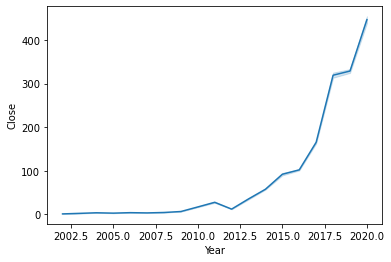

In [26]:
# The graph below shows a box plot of the cleaned Netflix stock price data, from the yaers 2002 to 2020, using the "Close" as the y-axis.

seaborn.lineplot(data = clean_netflix_df, x = "Year", y = "Close")

<AxesSubplot:xlabel='Year', ylabel='WorldwideBox Office'>

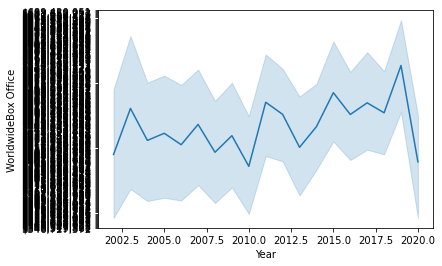

In [31]:
seaborn.lineplot(data = clean_box_df, x = "Year", y = "WorldwideBox Office")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2002'),
  Text(1, 0, '2003'),
  Text(2, 0, '2004'),
  Text(3, 0, '2005'),
  Text(4, 0, '2006'),
  Text(5, 0, '2007'),
  Text(6, 0, '2008'),
  Text(7, 0, '2009'),
  Text(8, 0, '2010'),
  Text(9, 0, '2011'),
  Text(10, 0, '2012'),
  Text(11, 0, '2013'),
  Text(12, 0, '2014'),
  Text(13, 0, '2015'),
  Text(14, 0, '2016'),
  Text(15, 0, '2017'),
  Text(16, 0, '2018'),
  Text(17, 0, '2019'),
  Text(18, 0, '2020')])

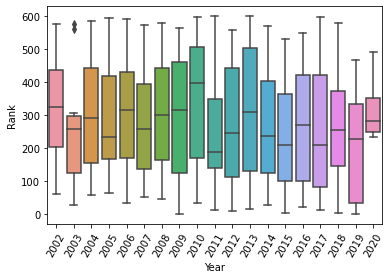

In [25]:
# The graph below shows a box plot of the cleaned worldwide box office revenue data.

seaborn.boxplot(data = clean_box_df, x = "Year", y = "Rank")
plt.xticks(rotation = 60)

<AxesSubplot:xlabel='Year', ylabel='Rank'>

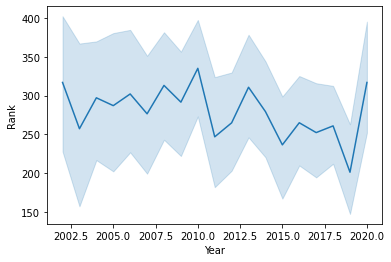

In [27]:
seaborn.lineplot(data = clean_box_df, x = "Year", y = "Rank")

(2) Comparing S&P 500 index price and Netflix stock price

<AxesSubplot:xlabel='Year', ylabel='Close'>

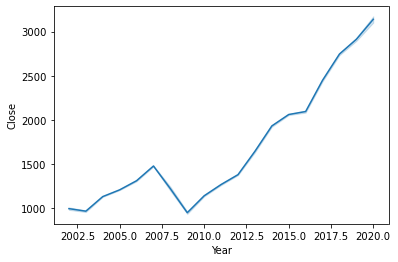

In [28]:
seaborn.lineplot(data = clean_sp500_df, x = "Year", y = "Close")

<AxesSubplot:xlabel='Year', ylabel='Close'>

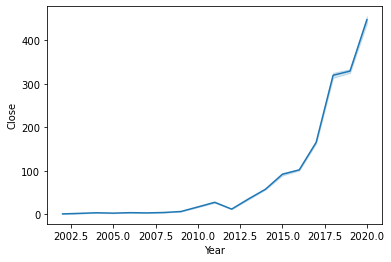

In [29]:
seaborn.lineplot(data = clean_netflix_df, x = "Year", y = "Close")

(2) Comparing S&P 500 index price and domestic box office revenue

In [17]:
%sql clean_box_avgrank_df << SELECT AVG(Rank) AS avgrank, Year FROM clean_box_df GROUP BY Year ORDER BY Year

Returning data to local variable clean_box_avgrank_df


In [18]:
%sql clean_netflix_avgclose_df << SELECT AVG(Close) AS avgclose, Year FROM clean_netflix_df GROUP BY Year ORDER BY Year
clean_netflix_avgclose_df

Returning data to local variable clean_netflix_avgclose_df


,avgclose,Year
0,0.850172,2002
1,2.081205,2003
2,3.413430,2004
3,2.597262,2005
4,3.690996,2006
5,3.123933,2007
6,4.094670,2008
7,6.322035,2009
8,16.824172,2010
9,27.493719,2011


In [19]:
clean_box_avgrank_df

,avgrank,Year
0,317.000000,2002
1,257.272727,2003
2,297.187500,2004
3,287.071429,2005
4,302.133333,2006
5,276.526316,2007
6,313.181818,2008
7,291.583333,2009
8,335.241379,2010
9,246.818182,2011


In [20]:
boxrank_netflixclose_df = pd.concat([clean_box_avgrank_df, clean_netflix_avgclose_df], axis=1, join='inner')
display(result)

NameError: name 'result' is not defined

Text(0.5, 1.0, 'Comparing Netflix Average Stock Price v. Average Box Office Ranking')

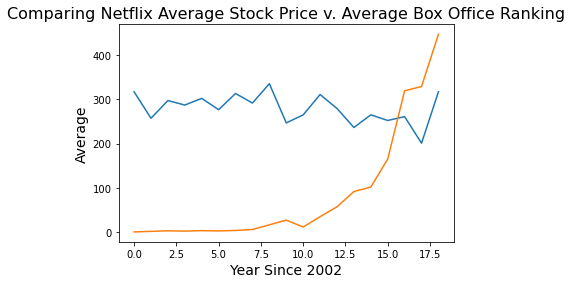

In [32]:
plt.plot(boxrank_netflixclose_df['avgrank'])
plt.plot(boxrank_netflixclose_df['avgclose'])
plt.ylabel('Average', fontsize=14)
plt.xlabel('Year Since 2002', fontsize=14)
plt.title('Comparing Netflix Average Stock Price v. Average Box Office Ranking', fontsize=16)

**Questions for Reviewers:**

How can we improve on the complexity and clarity of our research questions?
How should we go about saving our new cleaned datasets in our GitHub repository, or is it acceptable to clean the data from within our .ipynb files and simply keep the raw data files there?
Suggestions on other kinds of data visualizations we can explore for our data analysis?
How thorough and on-track are our analyses of the analyzed trends?
What are some ways we can tangibly strengthen our exploratory data analysis?
What are some other clear limitations of our datasets aside from the ones already listed?